# **Complete analysis of online Shopping behavior**

## This is a Data Science Project to aid complete analysis of online Shopping behavior and this is analysis intensive.

### The data set for this assignment is from "Online Shoppers Purchasing Intention Dataset Data Set" https://www.kaggle.com/henrysue/online-shoppers-intention
### The goal is to develop Machine Learning Models to present a complete analysis for online shopping behavior data set.

## Description of data set:
### This data set represents skewed data, such that 84.5% of user journeys did NOT result in a purchase (Revenue=False)

* The dataset consists of 10 numerical and 8 categorical attributes.
* The 'Revenue' attribute can be used as the class label.
* "Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. 
* The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another. 
* The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. 
* The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. 
* The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page and it represents the percentage that the page was seen in the last session. 
* The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. 
* The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. 
* The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.


# Step 1: Building a predictive classification model. Trained the model on data entries corresponding to the months of June-Dec, and tested the model on data entries corresponding to Feb-March.

In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import sklearn
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.naive_bayes import GaussianNB 
from sklearn import metrics 
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.dummy import DummyClassifier


from sklearn.cluster import KMeans
from sklearn.datasets import make_classification, make_blobs
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import *
from sklearn.metrics import *
from sklearn.semi_supervised import LabelSpreading, LabelPropagation
from sklearn.svm import SVC
from xgboost import XGBClassifier
from yellowbrick.cluster import KElbowVisualizer

In [ ]:
shopping = pd.read_csv('data/online_shoppers_intention.csv')
shopping.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [ ]:
shopping.describe(include='all')

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330,12330
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,3,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,May,NaN,NaN,NaN,NaN,Returning_Visitor,False,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3364,NaN,NaN,NaN,NaN,10551,9462,10422
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,NaN,2.124006,2.357097,3.147364,4.069586,NaN,NaN,NaN
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,NaN,0.911325,1.717277,2.401591,4.025169,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,NaN,2.000000,2.000000,1.000000,2.000000,NaN,NaN,NaN
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,NaN,2.000000,2.000000,3.000000,2.000000,NaN,NaN,NaN
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,NaN,3.000000,2.000000,4.000000,4.000000,NaN,NaN,NaN


In [ ]:
nullcount = shopping.isnull().sum()
print('Total number of null values in dataset:', nullcount.sum())

Total number of null values in dataset: 0


## **Checking for number of unique values for each feature**

In [ ]:
uniques = shopping.nunique(axis=0)
print(uniques)

Administrative               27
Administrative_Duration    3335
Informational                17
Informational_Duration     1258
ProductRelated              311
ProductRelated_Duration    9551
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64


## **Determine which columns are numeric and which are categorical**

In [ ]:
print(shopping.info())
num_dtypes_list  = ["int_", "int8", "int16","int32","int64","uint8","uint16","uint32","uint64","float_","float16","float32","float64"]
non_numeric_cols = [col for col in shopping.columns if shopping[col].dtypes not in num_dtypes_list]
print("\nThe non-numeric_columns are: ",non_numeric_cols)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

## **Removing unneccessary columns from data: shopping_clean**

In [ ]:
shopping_clean = shopping.drop(['Month','Browser','OperatingSystems','Region','TrafficType','Weekend'], axis=1)

In [ ]:
visitor_encoded = pd.get_dummies(shopping_clean['VisitorType'], prefix='Visitor_Type', drop_first = True)

shopping_clean_merged = pd.concat([shopping_clean, visitor_encoded], axis=1).drop(['VisitorType'], axis=1)

## **Convert the non-numeric data to one-hot encoded values**

In [ ]:
shopping_df = pd.get_dummies(shopping, columns = non_numeric_cols)
shopping_df.to_csv("shopping_onehot.csv")

## **Print the new data structure**

In [ ]:
print("The new data structure after one-hot encoding is: \n")
print("Shape: ",shopping_df.shape)
print("Columns: \n",shopping_df.columns)
month_cols = [x for x in shopping_df.columns if x[:5]=="Month"]
print("The shopping months are: ",month_cols)
print(len(month_cols), "shopping months are represented. NOTE: Two months are missing - Jan/Apr")

n_shoppers = len(shopping_df)     

The new data structure after one-hot encoding is: 

Shape:  (12330, 31)
Columns: 
 Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Month_Aug',
       'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June', 'Month_Mar',
       'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep',
       'VisitorType_New_Visitor', 'VisitorType_Other',
       'VisitorType_Returning_Visitor', 'Weekend_False', 'Weekend_True',
       'Revenue_False', 'Revenue_True'],
      dtype='object')
The shopping months are:  ['Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep']
10 shopping months are represented. NOTE: Two months are missing - Jan/Apr


## **Split the dataset into training and test**

*   Train the model on data in the months of June-Dec
*   Test the model on data from to Feb-March

First filter by month, then drop month from the training / test data as the months don't overlap


In [ ]:
train_df = shopping_df[ (shopping_df["Month_Feb"]!= 1) & (shopping_df["Month_Mar"] != 1) ]
train_df.drop(columns=month_cols,inplace=True)
n_train = len(train_df)
print("Size of training data = visits in June-Dec = ", n_train)
train_df.to_csv("training_data.csv")

Size of training data = visits in June-Dec =  10239


In [ ]:
test_df = shopping_df[ (shopping_df["Month_Feb"]== 1) ^ (shopping_df["Month_Mar"] == 1) ]
test_df.drop(columns=month_cols,inplace=True)
n_test = len(test_df)
print("Size of test data = visits in Feb-Mar = ", n_test)
test_df.to_csv("test_data.csv")

Size of test data = visits in Feb-Mar =  2091


In [ ]:
assert n_test + n_train == n_shoppers

In [ ]:
X_train = train_df.iloc[:,:-2]
print(X_train.shape)

y_train = train_df["Revenue_True"].values.reshape(-1,1)
print(y_train.shape)

X_test = test_df.iloc[:,:-2]
print(X_test.shape)

y_test = test_df["Revenue_True"].values.reshape(-1,1)
print(y_test.shape)

(10239, 19)
(10239, 1)
(2091, 19)
(2091, 1)


# Data Visualization/ Discovery

## **Get count of transaction completed and not completed as bar chart**

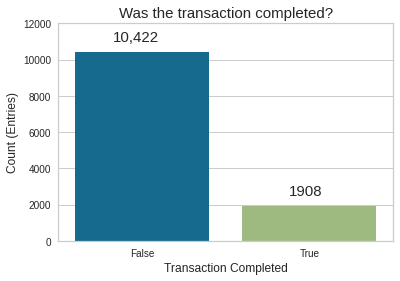

In [ ]:
sns.countplot(shopping['Revenue'])
plt.ylim(0,12000)
plt.title('Was the transaction completed?', fontsize= 15)
plt.xlabel('Transaction Completed', fontsize=12)
plt.ylabel('Count (Entries)', fontsize=12)
plt.text(x=-.175, y=11000 ,s='10,422', fontsize=15)
plt.text(x=.875, y=2500, s='1908', fontsize=15)
plt.show()

## **Split the data into buyers / browsers**


In [ ]:
buyer_df   = shopping_df[shopping_df["Revenue_True"] == 1]
n_buyers   = len(buyer_df)

browser_df = shopping_df[shopping_df["Revenue_False"] == 1]
n_browsers = len(browser_df)

print("Shoppers:",n_shoppers,"| Browsers",n_browsers,"| Buyers",n_buyers,"| Non-Purchase Ratio",(1-(n_buyers/n_shoppers)))

assert n_buyers + n_browsers == n_shoppers

Shoppers: 12330 | Browsers 10422 | Buyers 1908 | Non-Purchase Ratio 0.8452554744525548


In [ ]:
print("Stats for buyers")
buyer_stats = buyer_df.describe()
buyer_df.describe()

Stats for buyers


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_False,Weekend_True,Revenue_False,Revenue_True
count,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,...,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.00000,1908.000000,1908.000000,1908.0,1908.0
mean,3.393606,119.483244,0.786164,57.611427,48.210168,1876.209615,0.005117,0.019555,27.264518,0.023166,...,0.398323,0.060273,0.045073,0.221174,0.008386,0.77044,0.738470,0.261530,0.0,1.0
std,3.730527,201.114732,1.521176,171.619131,58.267365,2312.214392,0.012185,0.016463,35.191954,0.123521,...,0.489681,0.238053,0.207519,0.415146,0.091213,0.42066,0.439583,0.439583,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,1.0
25%,0.000000,0.000000,0.000000,0.000000,15.000000,541.906250,0.000000,0.009521,3.641144,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.0,1.0
50%,2.000000,52.366667,0.000000,0.000000,29.000000,1109.906250,0.000000,0.016000,16.758134,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,1.000000,0.000000,0.0,1.0
75%,5.000000,151.083333,1.000000,19.000000,57.000000,2266.011310,0.006452,0.025000,38.897742,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.00000,1.000000,1.000000,0.0,1.0
max,26.000000,2086.750000,12.000000,1767.666667,534.000000,27009.859430,0.200000,0.200000,361.763742,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,0.0,1.0


In [ ]:
print("Stats for browsers")
browser_stats = browser_df.describe()
browser_df.describe()

Stats for browsers


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_False,Weekend_True,Revenue_False,Revenue_True
count,10422.000000,10422.000000,10422.000000,10422.000000,10422.000000,10422.000000,10422.000000,10422.000000,10422.000000,10422.000000,...,10422.000000,10422.000000,10422.000000,10422.000000,10422.000000,10422.000000,10422.000000,10422.000000,10422.0,10422.0
mean,2.117732,73.740111,0.451833,30.236237,28.714642,1069.987809,0.025317,0.047378,1.975998,0.068432,...,0.214738,0.041643,0.034734,0.122050,0.006621,0.871330,0.772692,0.227308,1.0,0.0
std,3.202481,171.017970,1.211582,133.909306,40.744717,1803.797757,0.051877,0.051231,9.072424,0.209054,...,0.410660,0.199781,0.183115,0.327359,0.081101,0.334851,0.419113,0.419113,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0
25%,0.000000,0.000000,0.000000,0.000000,6.000000,151.000000,0.000000,0.015560,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.0,0.0
50%,0.000000,0.000000,0.000000,0.000000,16.000000,510.190000,0.004255,0.028571,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.0,0.0
75%,3.000000,83.000000,0.000000,0.000000,35.000000,1331.816667,0.020000,0.053846,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.0,0.0
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,246.758590,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,0.0


### **comparing the selective columns in terms of Buyers vs Browsers**


Key Buyer Statistics

Administrative                3.393606
Administrative_Duration     119.483244
Informational                 0.786164
Informational_Duration       57.611427
ProductRelated               48.210168
ProductRelated_Duration    1876.209615
BounceRates                   0.005117
ExitRates                     0.019555
PageValues                   27.264518
SpecialDay                    0.023166
Name: mean, dtype: float64

Key Browser Statistics

Administrative                2.117732
Administrative_Duration      73.740111
Informational                 0.451833
Informational_Duration       30.236237
ProductRelated               28.714642
ProductRelated_Duration    1069.987809
BounceRates                   0.025317
ExitRates                     0.047378
PageValues                    1.975998
SpecialDay                    0.068432
Name: mean, dtype: float64


<BarContainer object of 10 artists>

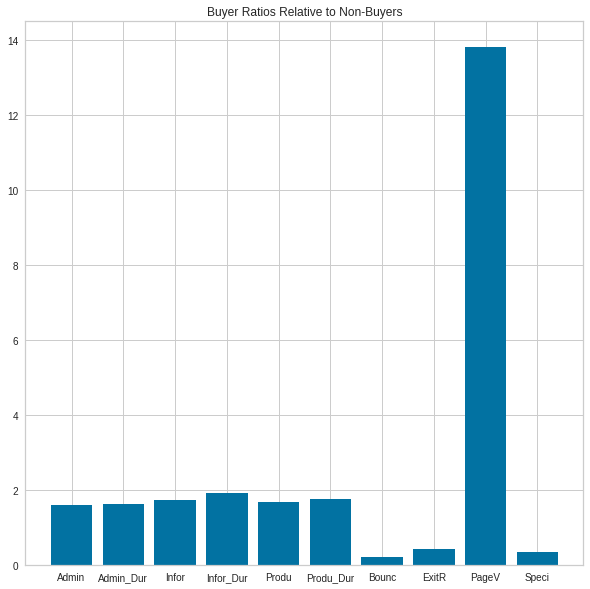

In [ ]:
print("\nKey Buyer Statistics\n")
print(buyer_stats.loc["mean"][:10])

print("\nKey Browser Statistics\n")
print(browser_stats.loc["mean"][:10])

relative_mean = (buyer_stats.loc["mean"][:10] / browser_stats.loc["mean"][:10]).values
#print(relative_mean)

# Plot

plot_cols    = [x[:5]+"_Dur" if idx in [1,3,5] else x[:5] for idx,x in enumerate(buyer_stats.columns) ][:10]
plt.rcParams['figure.figsize'] = [10, 10]
plt.title("Buyer Ratios Relative to Non-Buyers")
plt.bar(plot_cols,relative_mean)

Index(['VisitorType_New_Visitor', 'VisitorType_Other',
       'VisitorType_Returning_Visitor', 'Weekend_False', 'Weekend_True'],
      dtype='object')

Buyer stats

VisitorType_New_Visitor          0.221174
VisitorType_Other                0.008386
VisitorType_Returning_Visitor    0.770440
Weekend_False                    0.738470
Weekend_True                     0.261530
Name: mean, dtype: float64

Browser stats

VisitorType_New_Visitor          0.122050
VisitorType_Other                0.006621
VisitorType_Returning_Visitor    0.871330
Weekend_False                    0.772692
Weekend_True                     0.227308
Name: mean, dtype: float64


<BarContainer object of 5 artists>

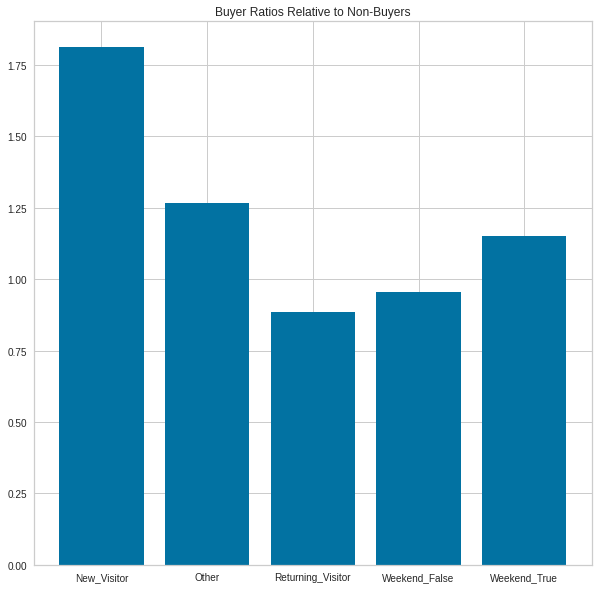

In [ ]:
print(shopping_df.columns[-7:-2])

print("\nBuyer stats\n")
print(buyer_stats.loc["mean"][-7:-2])

print("\nBrowser stats\n")
print(browser_stats.loc["mean"][-7:-2])

relative_mean = (buyer_stats.loc["mean"][-7:-2] / browser_stats.loc["mean"][-7:-2]).values
#print(relative_mean)

plot_cols    = [x[x.find("_")+1:] for x in buyer_stats.columns ][-7:-2]
plot_cols[-2]= "Weekend_"+plot_cols[-2]
plot_cols[-1]= "Weekend_"+plot_cols[-1]
#print(plot_cols)

plt.rcParams['figure.figsize'] = [10, 10]
plt.title("Buyer Ratios Relative to Non-Buyers")
plt.bar(plot_cols,relative_mean)

as shown as above visualizations of ratio of buyers/non-buyers for each metric which values are close to 1 mean that the patters of buyers/non-buyers are very similar. Values that are >1 significantly different could be meaningful features. so 'PageValues' feature appears to be one of interest. Values which are significantly <1 could be also meaningful features as 'Bounce_Rates'.

# Feature Importance Ranking

Its better to identify features that have higher predictive values than others. To find our that we can quickly run a classifier that offers explainability of the predictive values of the features. Random forest we can use for this purpose and this is not our final model. 
'PageValue' once again shows up as an important feature using both approaches as do others. The most informative features are shown and ranked as below.

## **Calculate the importance of each feature using a random forest**

In [ ]:
def feature_importance(X_train, y_train, feature_desc, bPrint = False, bPlot = False):
   
    forest = ExtraTreesClassifier(n_estimators=20,random_state=0)
    forest.fit(X_train, y_train)
    
    importances = forest.feature_importances_
    
    assert len(importances) == len(feature_desc)
    
    std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
    indices = np.argsort(importances)[::-1]
    
    if bPrint:

        print("Feature Ranking:\n")

        for f in range(X_train.shape[1]):
            print("%02d. %s %2.1f" % (f + 1, feature_desc[indices[f]], importances[indices[f]]*100))
            
    if bPlot:            

        # Plot the feature importances

        plt.figure()
        plt.title("Feature # Importance")
        plt.bar(range(X_train.shape[1]), importances[indices],
                color="r", yerr=std[indices], align="center")
        plt.xticks(range(X_train.shape[1]), indices)
        plt.xlim([-1, X_train.shape[1]])
        plt.show()
    
    return (indices,importances)

Feature Ranking:

01. PageValues 31.3
02. ExitRates 8.8
03. ProductRelated_Duration 8.0
04. ProductRelated 7.9
05. BounceRates 5.8
06. Administrative 5.8
07. Administrative_Duration 5.6
08. TrafficType 5.2
09. Region 4.8
10. Browser 3.5
11. OperatingSystems 3.2
12. Informational_Duration 3.2
13. Informational 3.1
14. SpecialDay 1.0
15. Weekend_True 0.8
16. Weekend_False 0.8
17. VisitorType_New_Visitor 0.7
18. VisitorType_Returning_Visitor 0.5
19. VisitorType_Other 0.1


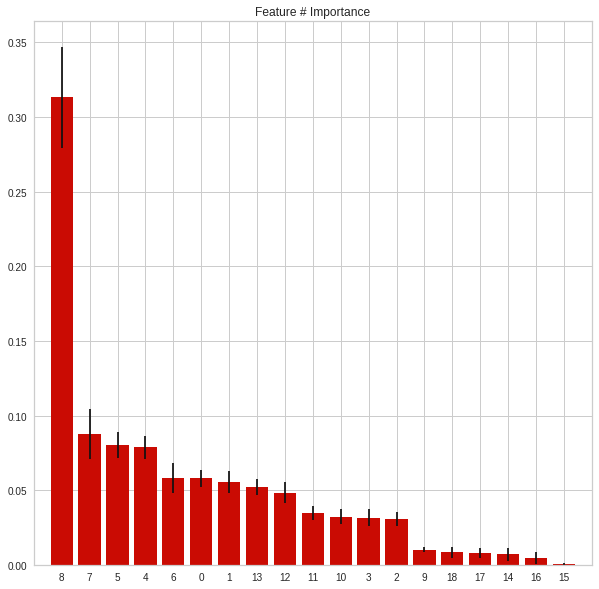

In [ ]:
(indices,importances) = feature_importance(X_train,y_train,train_df.iloc[:,:-2].columns,bPrint=True,bPlot=True)

# Classification Model

For this project it is tempting to just consider "Accuracy" as the key metric but classification accuracy is not enough when classes are imbalanced as 14% purchase ratio.

To illustrate the "Falacy of Accuracy" (or Accuracy Paradox), a Lazy classifier created. It does not train and will always return a NO_PURCHASE value. When compared on just "Accuracy" it looks OK vs other classifiers. It is only when one looks at "Precision","Recall","F1" etc. that the problems become apparent as it scores a zero and its super laziness and lack of utility is revealed.

Also "Too Optimistic" Classifier created which will alway predict a PURCHASE. Can see how Recall gets skewed in there.

"Lazy" has high accuracy because even though TP is zero / TN is a high number hence a high score. Precision is zero because it cannot differentiate a True Positive (can't predict a purchase)

"Too Optimistic" has low accuracy but perfect Recall because it always predicts a purchase correctly and never generates a false negative

So opted for F-Score as the relevent metric to optimize. A balanced F-score (F1 score) is the harmonic mean of precision and recall. We are thus judging the model

## Helper Functions

In [ ]:
class cScoreboard():
    
    def __init__(self):
        self.results = {'Model':[],'Accuracy':[],'Precision':[],'Recall':[],'F1':[],'CM':[],'Train':[],'Predict':[]}
    
    def get_score(self, model_desc, y_test, y_pred, training_time=0, prediction_time=0,ROC=None):
        self.results["Model"].append(model_desc)
        self.results["Accuracy"].append(accuracy_score(y_test, y_pred))
        self.results["Precision"].append(precision_score(y_test, y_pred))
        self.results["Recall"].append(recall_score(y_test, y_pred))
        self.results["F1"].append(f1_score(y_test, y_pred))
        self.results["CM"].append(confusion_matrix(y_test, y_pred))
        self.results["Train"].append(training_time)
        self.results["Predict"].append(prediction_time)
        
    def score_models(self, ml_models, X_train, y_train, X_test, y_test):
        
        for model_desc, model in ml_models:

            print("Running",model_desc)

            t_start = time.perf_counter()
            model.fit(X_train, y_train)
            t_end   = time.perf_counter()

            p_start = time.perf_counter()
            y_pred  = model.predict(X_test)
            p_end   = time.perf_counter()
            
            self.get_score(model_desc,y_test,y_pred,(t_end-t_start),(p_end-p_start))

    def plot_AUC_models(self, ml_models, X_train, y_train, X_test, y_test):
        
        for model_desc, model in ml_models:

            print("Plotting AUC: ",model_desc)

            model.fit(X_train, y_train)
            y_pred_proba = model.predict_proba(X_test)[::,1]
            fpr, tpr, _  = roc_curve(y_test,y_pred_proba)
            auc          = roc_auc_score(y_test, y_pred_proba)
            label_str    = model_desc + " AUC:" + str(auc)[:5]
            plt.plot(fpr,tpr,label=label_str)
            
        # end for    
            
        plt.legend(loc=4)
        plt.show()        


    def print(self,sort_col="F1"):
        results_df = pd.DataFrame.from_dict(self.results, orient='columns')
        results_df.reset_index(drop=True, inplace=True)
        display(results_df.sort_values(by=sort_col, ascending=False))
        


## Custom ML Model created to illustrate the "Falacy of Accuracy" when classes are highly imbalanced
## Does not train - only predicts majority class


In [ ]:
class LazyClassifier():
    
    def __init__(self, majority_class = 0):
        self.majority_class = majority_class
    
    def fit(self,X_train, y_train):
        # Do nothing - lazy trainer
        pass

    def predict(self, X_test):
        a = np.empty(X_test.shape[0])
        a.fill(self.majority_class)
        return a

### Constants


In [ ]:
INPUT_DATA_FILE        = "online_shoppers_intention.csv"
IMPORTANCE_THRESHOLD   = 0.025
UNLABELED_DATA         = -1
PURCHASE               = 1
NO_PURCHASE            = 0

SMALL_SIZE = 10
MEDIUM_SIZE = 12



### Variables and Configurations

In [ ]:

scoreboard = cScoreboard()

plt.rc('font', size=SMALL_SIZE)
plt.rc('axes', titlesize=MEDIUM_SIZE)
plt.rc('axes', labelsize=MEDIUM_SIZE)
plt.rcParams['figure.dpi']=150


%matplotlib inline

In [ ]:
import os, time, warnings
warnings.filterwarnings('ignore')

In [ ]:
ml_models = [("Lazy", LazyClassifier(majority_class=NO_PURCHASE)),
             ("Too Optimistic", LazyClassifier(majority_class=PURCHASE)),
             ("Logistic (Linear)",LogisticRegression()),
             ("Support Vector",SVC()),
             ("Random Forest",RandomForestClassifier(n_estimators=10)),
             ("XGBoost", XGBClassifier(n_estimators=100)),
]
scoreboard.score_models(ml_models, X_train, y_train, X_test, y_test)   
scoreboard.print()

Running Lazy
Running Too Optimistic
Running Logistic (Linear)
Running Support Vector
Running Random Forest
Running XGBoost


,Model,Accuracy,Precision,Recall,F1,CM,Train,Predict
5,XGBoost,0.950263,0.745946,0.707692,0.726316,"[[1849, 47], [57, 138]]",0.632023,0.006566
4,Random Forest,0.938785,0.731034,0.543590,0.623529,"[[1857, 39], [89, 106]]",0.128611,0.006356
2,Logistic (Linear),0.935438,0.788462,0.420513,0.548495,"[[1874, 22], [113, 82]]",0.214187,0.002687
1,Too Optimistic,0.093257,0.093257,1.000000,0.170604,"[[0, 1896], [0, 195]]",0.000001,0.000020
3,Support Vector,0.907700,1.000000,0.010256,0.020305,"[[1896, 0], [193, 2]]",3.052603,0.540602
0,Lazy,0.906743,0.000000,0.000000,0.000000,"[[1896, 0], [195, 0]]",0.000002,0.000041


Plotting AUC:  Logistic (Linear)
Plotting AUC:  Random Forest
Plotting AUC:  XGBoost


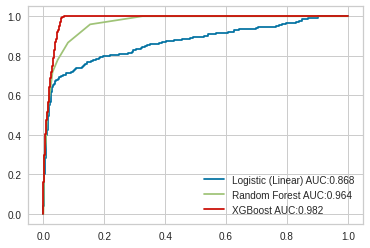

In [ ]:
ml_models = [("Logistic (Linear)",LogisticRegression()),
             ("Random Forest",RandomForestClassifier(n_estimators=10)),
             ("XGBoost", XGBClassifier(n_estimators=100)),
]

scoreboard.plot_AUC_models(ml_models, X_train, y_train, X_test, y_test)  

AUC score 1 represents perfect classifier, and 0.5 represents a worthless classifier.
AUC score for the baseline XGBoost case is 0.975.

# Check with AutoML approach

In addition to running the baseline models that are selected, also used TPOT to run an AutoML to see what it would select. The results generally confirm the previous works and those are below.

Run an AutoML routine to generate a baseline for the problem before feature extraction / engineering etc.

In [ ]:
!pip install tpot

     |████████████████████████████████| 87 kB 4.4 MB/s 
     |████████████████████████████████| 173.6 MB 8.7 kB/s 
     |████████████████████████████████| 160 kB 33.7 MB/s 
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11956 sha256=4115ee9d43bf35a21925e61970cc2aaa0584137b0c911d584fceb552b4d84286
  Stored in directory: /root/.cache/pip/wheels/e2/d2/79/eaf81edb391e27c87f51b8ef901ecc85a5363dc96b8b8d71e3
Successfully built stopit
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [ ]:
from tpot import TPOTClassifier

tpot = TPOTClassifier(generations=5, population_size=40, scoring='f1', verbosity=2, random_state=42)
tpot.fit(X_train, y_train)

Optimization Progress:   0%|          | 0/240 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.6223088031329617

Generation 2 - Current best internal CV score: 0.6329941776077778

Generation 3 - Current best internal CV score: 0.6329941776077778

Generation 4 - Current best internal CV score: 0.6387811068154339

Generation 5 - Current best internal CV score: 0.6422185399835805

Best pipeline: BernoulliNB(RFE(XGBClassifier(input_matrix, learning_rate=0.5, max_depth=3, min_child_weight=8, n_estimators=100, n_jobs=1, subsample=1.0, verbosity=0), criterion=entropy, max_features=1.0, n_estimators=100, step=0.4), alpha=0.001, fit_prior=False)


TPOTClassifier(generations=5, population_size=40, random_state=42, scoring='f1',
               verbosity=2)

## **Export the pipeline to a python file**

In [ ]:
tpot.export('tpot_products_pipeline.py')

## **Add the AutoML Model to the others on the scoreboard and rank**

In [ ]:
ml_models = [("XGBoost - AutoML", XGBClassifier(learning_rate=0.5, max_depth=3, min_child_weight=8, n_estimators=100, subsample=1.0))]
scoreboard.score_models(ml_models, X_train, y_train, X_test, y_test)
scoreboard.print()

Running XGBoost - AutoML


,Model,Accuracy,Precision,Recall,F1,CM,Train,Predict
6,XGBoost - AutoML,0.949307,0.730570,0.723077,0.726804,"[[1844, 52], [54, 141]]",0.608446,0.006370
5,XGBoost,0.950263,0.745946,0.707692,0.726316,"[[1849, 47], [57, 138]]",1.179287,0.006648
4,Random Forest,0.942611,0.738854,0.594872,0.659091,"[[1855, 41], [79, 116]]",0.124092,0.006204
2,Logistic (Linear),0.935438,0.788462,0.420513,0.548495,"[[1874, 22], [113, 82]]",0.242280,0.004789
1,Too Optimistic,0.093257,0.093257,1.000000,0.170604,"[[0, 1896], [0, 195]]",0.000002,0.000033
3,Support Vector,0.907700,1.000000,0.010256,0.020305,"[[1896, 0], [193, 2]]",3.153502,0.535806
0,Lazy,0.906743,0.000000,0.000000,0.000000,"[[1896, 0], [195, 0]]",0.000002,0.000251


# XGBoost Model with Hyperparameter Tuning

Considering above all results received and for a wide range of challenging problems (e.g. Kaggle) XGBoost has proven to be a solid performer. so it is no surprise as it has scored well relative to other models even on both standalone and AutoML context.

further more would like to do 2 things before formulating the Best Model as

>   1. Use a weighted XGBoost model to deal with the Class Imbalance problem and,
  2. Tune other hyperparameters accordingly

Imbalanced classification problems can be solved by tuning the "scale_pos_weight" hyperparameter, which is set to 1.0 by default. For our imbalanced binary classification data, the negative class refers to the majority class (NO_PURCHASE = Class 0) and the positive class refers to the minority class (PURCHASE = Class 1). So this "scale_pos_weight" hyperparameter has the effect of weighing the balance of positive examples relative to negative examples when boosting decision trees. 

The "scale_pos_weight" hyperparameter value is used to scale the gradient for the positive class. This can help the model achieve better performance when making predictions on the positive class. However, incorrect settings of this hyperparameter may lead to overfitting the positive class and poorer performance on the negative class.

A suggested value would be to set "scale_pos_weight" hyperparameter to the inverse of the class distribution. Because our non-purchase percentage of ~85% suggests a (100/(100-85)) = 6.5 ratio that can be tuned.

The Baseline results from the AutoML would use for the hyperparameter tuning and then some reasonable hyperparameters will add including "scale_pos_weight" hyperparameter to adjust for CLASS IMBALANCES.

In [ ]:
print("Hyperparameter tuning the XGBoost Model")

param_test = {
    'learning_rate':[0.1,0.05,0.01],
    'n_estimators':[100,150,200],
    'max_depth':[3,5,7,9],
    'min_child_weight':[5,10,16,20],
    'subsample':[0.1,0.25,0.35,0.5,1],
    'scale_pos_weight':[1,5,6.5,8]   
}

gsearch = GridSearchCV(estimator = XGBClassifier(learning_rate =0.05,
                                                 n_estimators=100,
                                                 max_depth=3,
                                                 min_child_weight=8,
                                                 subsample=0.1,
                                                 scale_pos_weight=6.5,
                                                 objective= 'binary:logistic',
                                                 tree_method = "gpu_hist"),
                       param_grid = param_test,
                       scoring='roc_auc',               
                       n_jobs=1,
                       verbose=2)

Hyperparameter tuning the XGBoost Model


In [ ]:
warnings.filterwarnings('ignore')

In [ ]:
X_train.shape

(10239, 19)

In [ ]:
gsearch.fit(X_train, y_train)

print('Best Grid Search Parameters :',gsearch.best_params_)
print('Best Grid Search Score : ',    gsearch.best_score_)

Streaming output truncated to the last 5000 lines.
[CV] END learning_rate=0.05, max_depth=9, min_child_weight=20, n_estimators=150, scale_pos_weight=1, subsample=0.1; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=9, min_child_weight=20, n_estimators=150, scale_pos_weight=1, subsample=0.1; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=9, min_child_weight=20, n_estimators=150, scale_pos_weight=1, subsample=0.1; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=9, min_child_weight=20, n_estimators=150, scale_pos_weight=1, subsample=0.25; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=9, min_child_weight=20, n_estimators=150, scale_pos_weight=1, subsample=0.25; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=9, min_child_weight=20, n_estimators=150, scale_pos_weight=1, subsample=0.25; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=9, min_child_weight=20, n_estimators=150, scale_pos_weight=1, subsample=0.25; total time=   0.5s


In [ ]:
ml_models = [("XGB (HyperP)", XGBClassifier(**gsearch.best_params_))]
scoreboard.score_models(ml_models, X_train, y_train, X_test, y_test)
scoreboard.print()

Running XGB (HyperP)


,Model,Accuracy,Precision,Recall,F1,CM,Train,Predict
7,XGB (HyperP),0.942133,0.619355,0.984615,0.760396,"[[1778, 118], [3, 192]]",2.871152,0.030795
6,XGBoost - AutoML,0.949307,0.730570,0.723077,0.726804,"[[1844, 52], [54, 141]]",0.608446,0.006370
5,XGBoost,0.950263,0.745946,0.707692,0.726316,"[[1849, 47], [57, 138]]",1.179287,0.006648
4,Random Forest,0.942611,0.738854,0.594872,0.659091,"[[1855, 41], [79, 116]]",0.124092,0.006204
2,Logistic (Linear),0.935438,0.788462,0.420513,0.548495,"[[1874, 22], [113, 82]]",0.242280,0.004789
1,Too Optimistic,0.093257,0.093257,1.000000,0.170604,"[[0, 1896], [0, 195]]",0.000002,0.000033
3,Support Vector,0.907700,1.000000,0.010256,0.020305,"[[1896, 0], [193, 2]]",3.153502,0.535806
0,Lazy,0.906743,0.000000,0.000000,0.000000,"[[1896, 0], [195, 0]]",0.000002,0.000251


## **Save the best model as Best Model and display the most important features**

In [ ]:
best_model = XGBClassifier(**gsearch.best_params_)

best_model.fit(X_train,y_train)

print("Running Feature Importance: ","\n")

importances_df = pd.DataFrame({
    'Feature':    X_train.columns,
    'Importance': best_model.feature_importances_
})

importances_df = importances_df.sort_values(by='Importance', ascending=False)
importances_df = importances_df.set_index('Feature')

print(importances_df)

Running Feature Importance:  

                               Importance
Feature                                  
PageValues                       0.502573
SpecialDay                       0.062824
VisitorType_New_Visitor          0.046516
ProductRelated_Duration          0.034126
ProductRelated                   0.033625
Administrative                   0.032066
Informational                    0.031576
VisitorType_Returning_Visitor    0.031307
TrafficType                      0.028671
ExitRates                        0.027788
BounceRates                      0.027703
Administrative_Duration          0.025246
Informational_Duration           0.024327
OperatingSystems                 0.023813
Browser                          0.023552
Weekend_False                    0.023475
Region                           0.020812
VisitorType_Other                0.000000
Weekend_True                     0.000000


# Step 2: Cluster Analysis - Generating user-bahavior clusters based on the purchasing behavior data for the complete dataset.

Now going to reduce the data to the most relevant features and then run a clustering analysis to determine logical clusters of shoppers. This will aid in a profiling exercise to determine similarities between shoppers and patterns as an example, 

> * tends to browse and buy nothing, 
* quickly exits, 
* spends time in high value areas and purchases etc.



## **Extract the indices corresponding to a feature importance > 0.025 (IMPORTANCE_THRESHOLD)**

In [ ]:
most_important_df = importances_df[(importances_df["Importance"] > IMPORTANCE_THRESHOLD)]
print(most_important_df)
selected_columns = most_important_df.index.values

                               Importance
Feature                                  
PageValues                       0.502573
SpecialDay                       0.062824
VisitorType_New_Visitor          0.046516
ProductRelated_Duration          0.034126
ProductRelated                   0.033625
Administrative                   0.032066
Informational                    0.031576
VisitorType_Returning_Visitor    0.031307
TrafficType                      0.028671
ExitRates                        0.027788
BounceRates                      0.027703
Administrative_Duration          0.025246


## **Perform cluster analysis on all of the one_hot encoded data**

In [ ]:
X_cluster = shopping_df.iloc[:,:-2]
print(X_cluster.shape)

y_cluster = shopping_df["Revenue_True"].values.reshape(-1,1)
print(y_cluster.shape)

(12330, 29)
(12330, 1)


## **Use PCA to determine the optimal count for the clusters**

In [ ]:
pca = PCA(n_components=8)
X_red = pca.fit_transform(X_cluster)
print(X_red.shape)

(12330, 8)


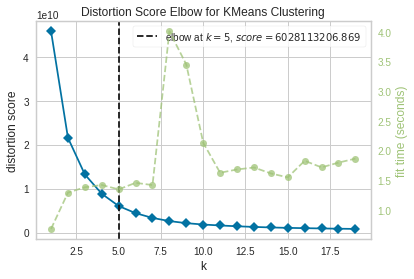

In [ ]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,20))
visualizer.fit(X_red)
visualizer.show() 

The PCA analysis suggests 5 logical clusters - e.g. value at Elbow

We will also try using a T-SNE methodology

The T-SNE results (below) suggest using 6 clusters

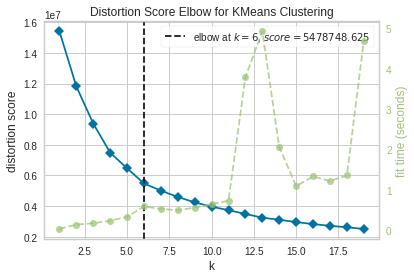

In [ ]:
tsne_op = TSNE(n_components=3, perplexity=2)
X_red_t = np.array(tsne_op.fit_transform(X_cluster))

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,20))
visualizer.fit(X_red_t)
visualizer.show()

## Final thoughts about Cluster analysis

Optimal number of clusters is 5 based on average of the Elbow methods.

Select columns from the feature reduction and add the Purchase information "Purchase_True" and then add ClusterID to this data and save as a new file.

In [ ]:
n = 5
clusters = KMeans(n_clusters = n)
C_vals   = np.array(clusters.fit_predict(X_red))

X_save = pd.DataFrame(shopping_df[selected_columns])
X_save['Purchase'] = shopping_df.iloc[:,-1]
X_save['ClusterID'] = C_vals
X_save.head()
X_save.to_csv('shopping_clusters.csv', index=False)

### Reload the file and examine the training data

In [ ]:
X_train = pd.read_csv('shopping_clusters.csv')
X=X_train.iloc[:,0:-2].values
X_train.head()

,PageValues,SpecialDay,VisitorType_New_Visitor,ProductRelated_Duration,ProductRelated,Administrative,Informational,VisitorType_Returning_Visitor,TrafficType,ExitRates,BounceRates,Administrative_Duration,Purchase,ClusterID
0,0.0,0.0,0,0.000000,1,0,0,1,1,0.20,0.20,0.0,0,0
1,0.0,0.0,0,64.000000,2,0,0,1,2,0.10,0.00,0.0,0,0
2,0.0,0.0,0,0.000000,1,0,0,1,3,0.20,0.20,0.0,0,0
3,0.0,0.0,0,2.666667,2,0,0,1,4,0.14,0.05,0.0,0,0
4,0.0,0.0,0,627.500000,10,0,0,1,4,0.05,0.02,0.0,0,0


In [ ]:
column_values   = X_train['ClusterID'].values
unique_values_a = np.unique(column_values)
unique_values   = np.sort(unique_values_a)
print("Number of unique clusters =",len(unique_values),"and their Class IDs:",unique_values)

Number of unique clusters = 5 and their Class IDs: [0 1 2 3 4]


In [ ]:
purchase_percentage       = np.zeros(len(unique_values))
representation_percentage = np.zeros(len(unique_values))

# Loop through the clusters

for index, item in enumerate(unique_values):
    locations = len(X_train[X_train['ClusterID']==item])
    purchases = len(X_train[(X_train['ClusterID']==item) & (X_train['Purchase']==1)])
    representation_percentage[index] = locations / len(X_train)
    purchase_percentage[index]       = purchases / locations 

Representation Percentage= [0.67445255 0.23990268 0.01524736 0.06958637 0.00081103]
Purchase Percentage= [0.11544012 0.21534821 0.33510638 0.28671329 0.2       ]


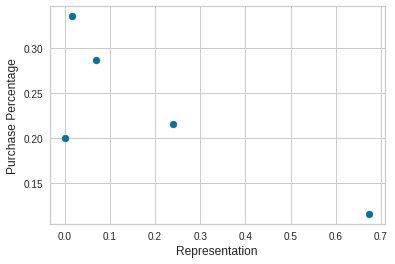

In [ ]:
print('Representation Percentage=',representation_percentage)
print('Purchase Percentage=',purchase_percentage)
plt.scatter(representation_percentage,purchase_percentage)
plt.xlabel('Representation')
plt.ylabel('Purchase Percentage')
plt.show()

In [ ]:
import seaborn as sb

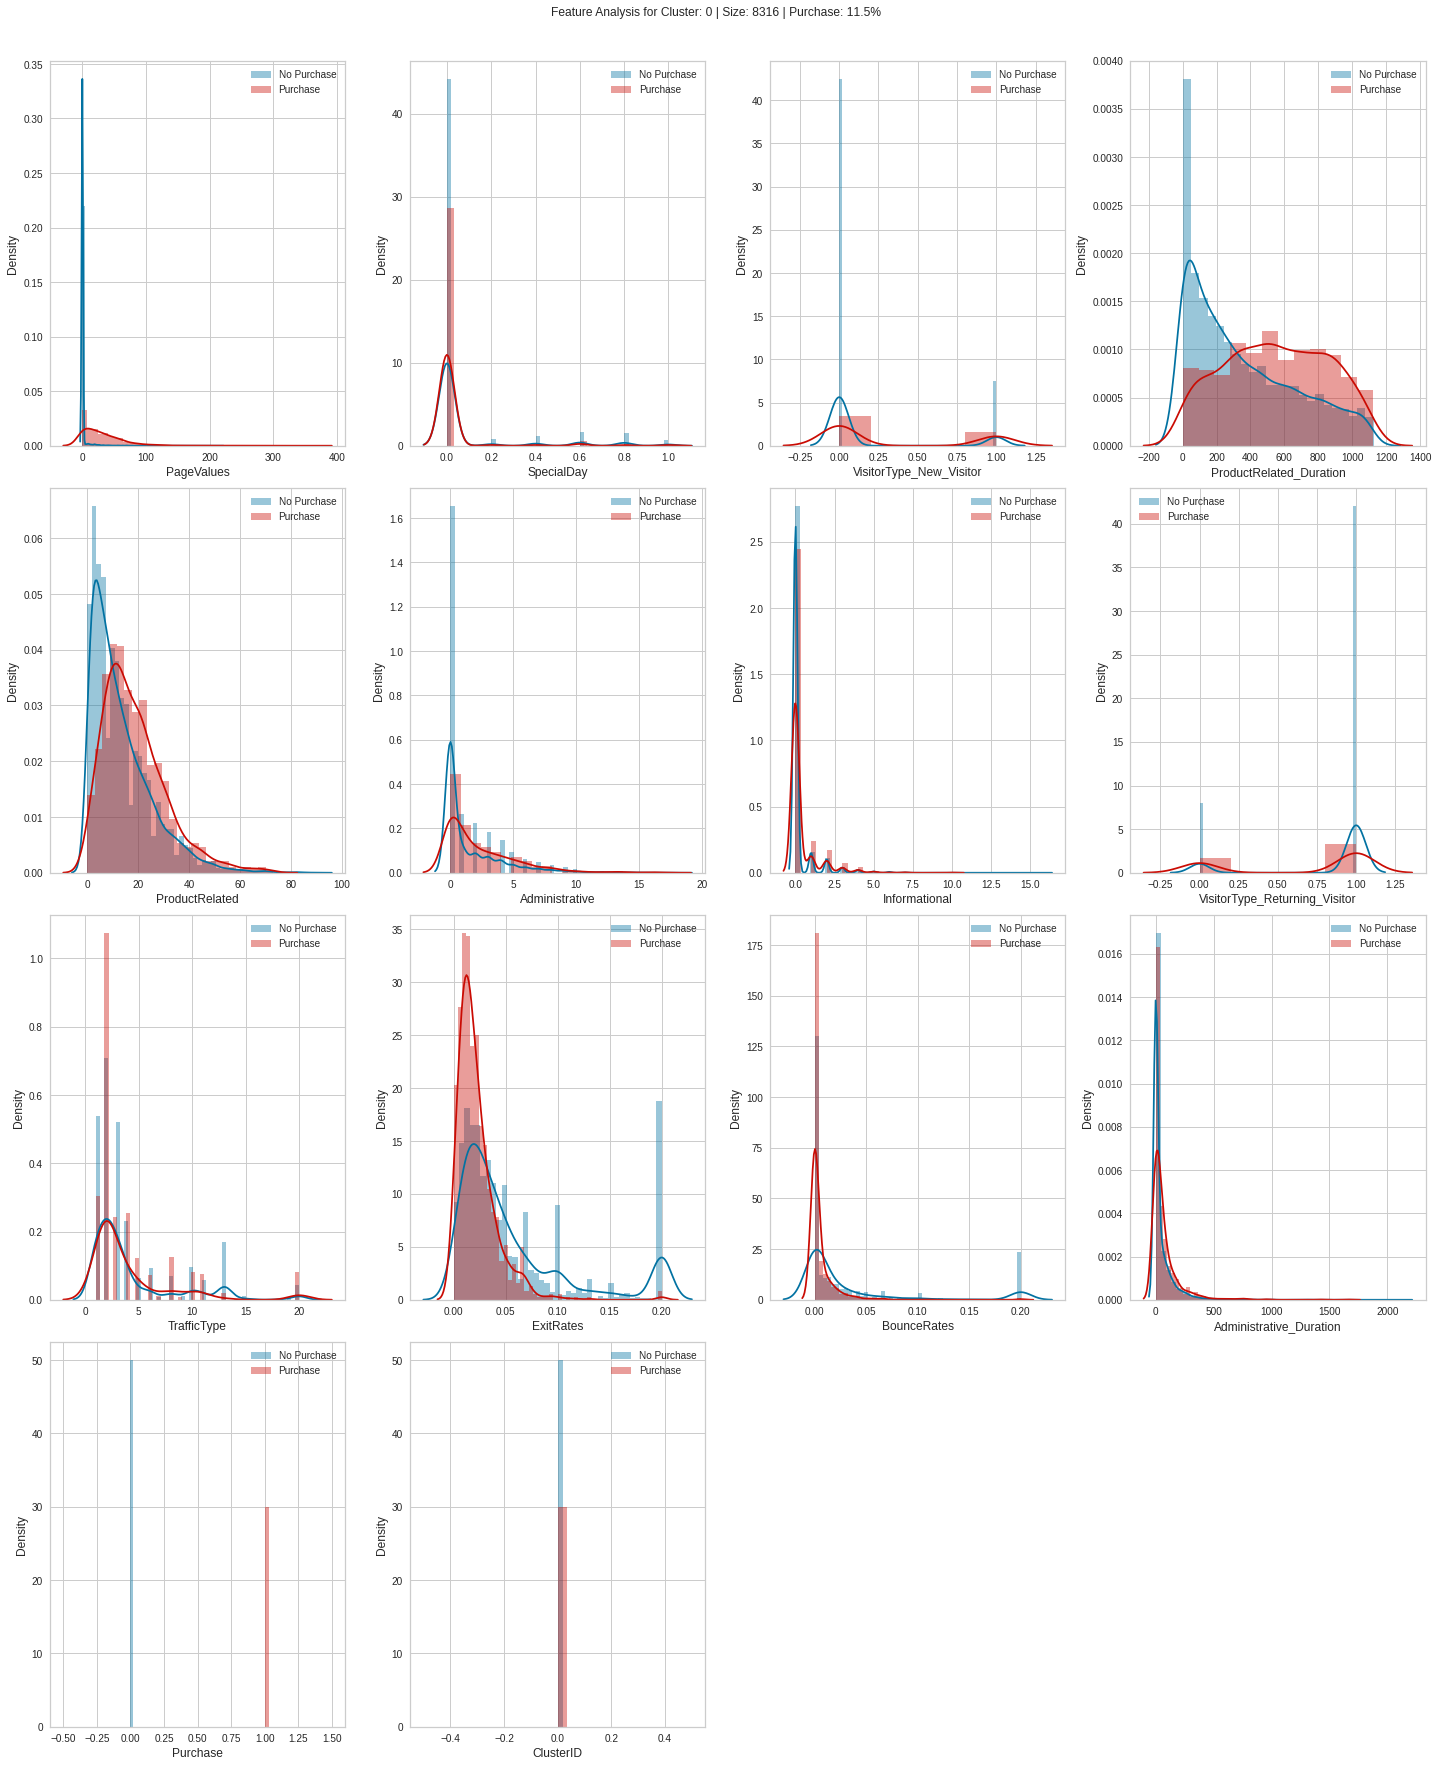

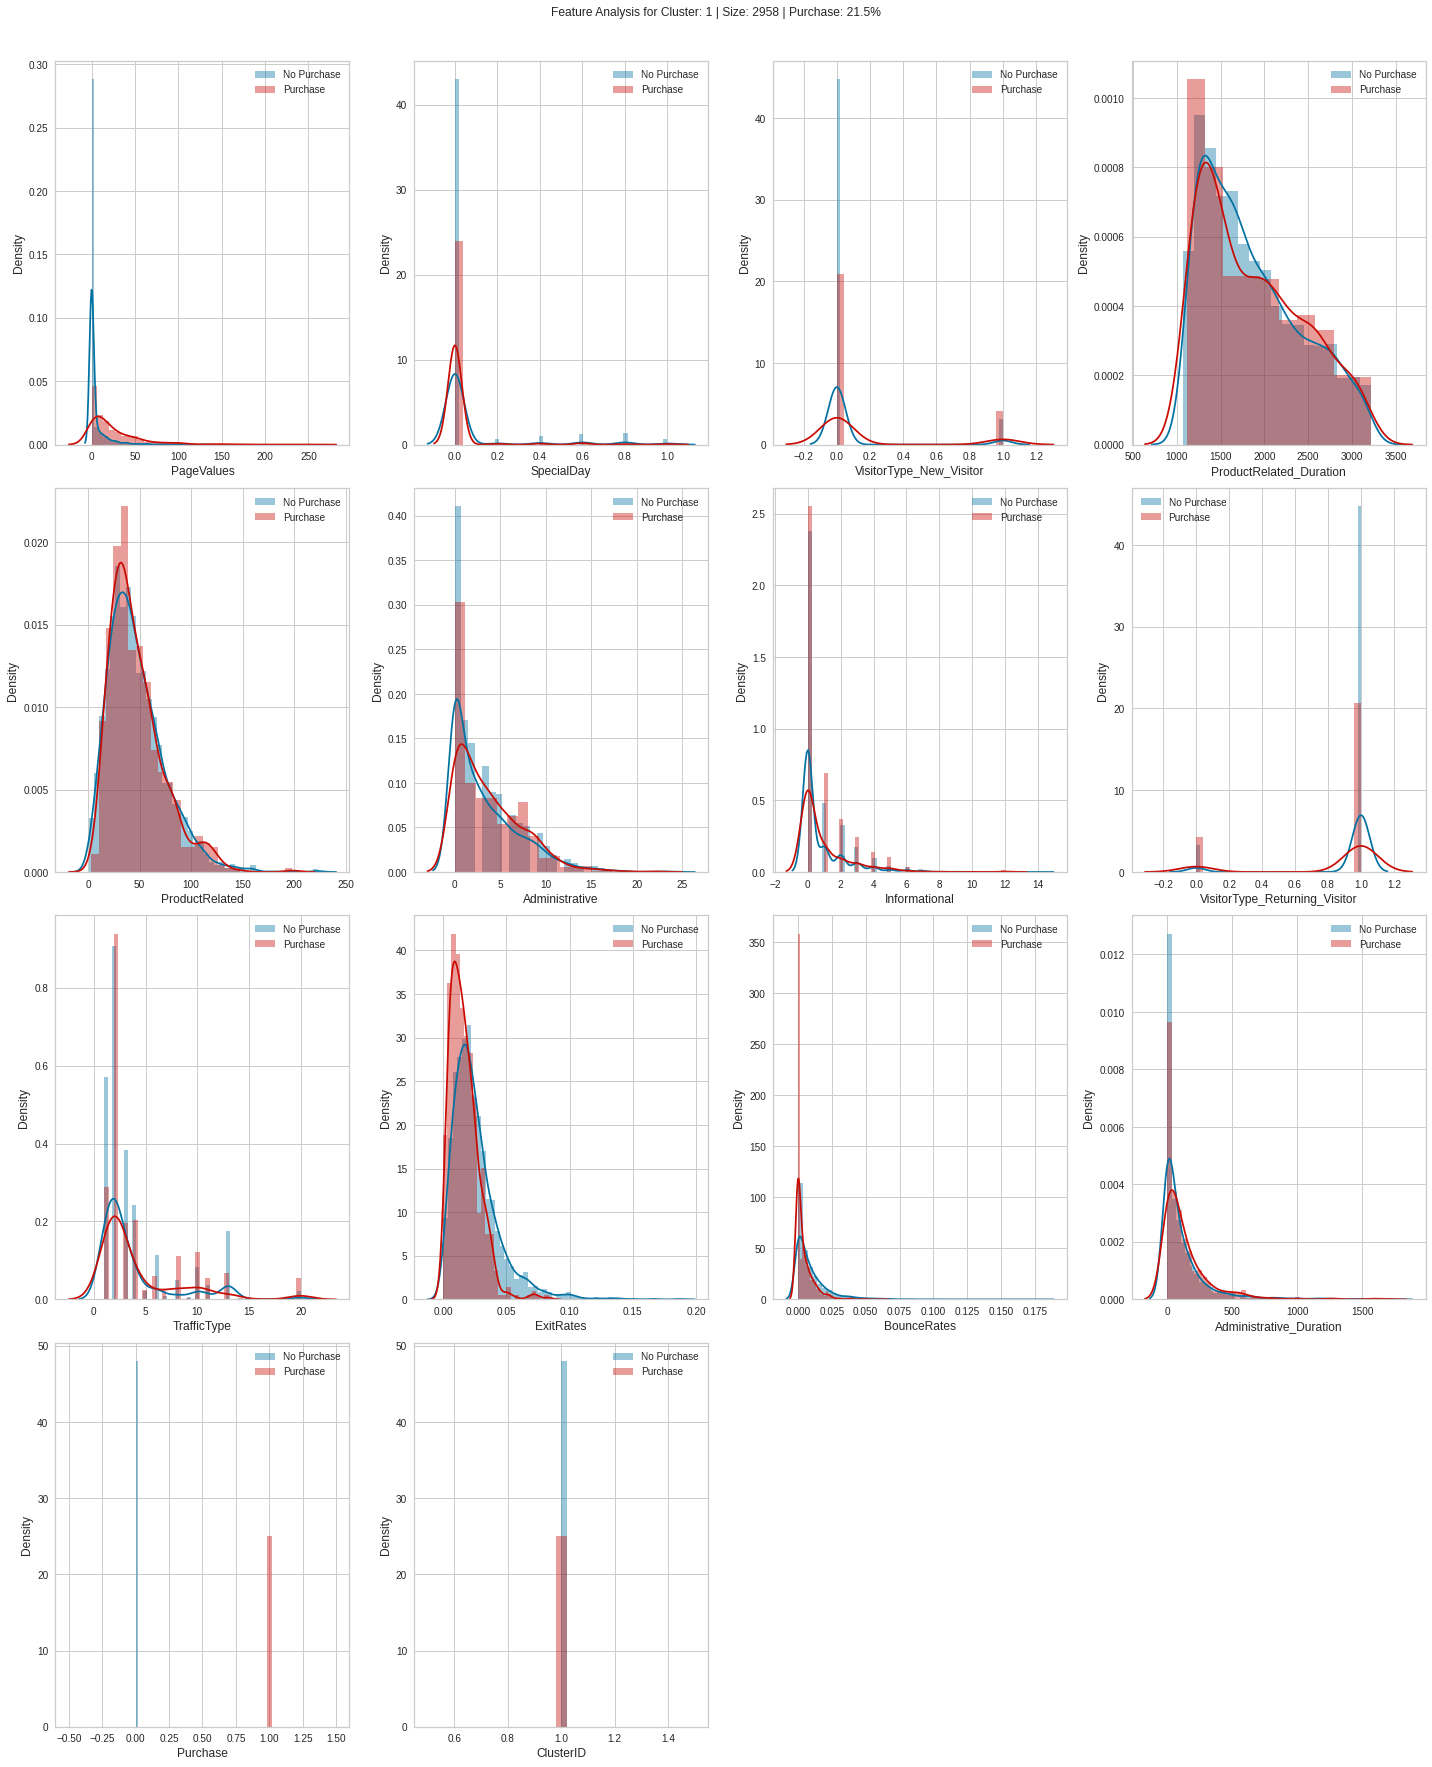

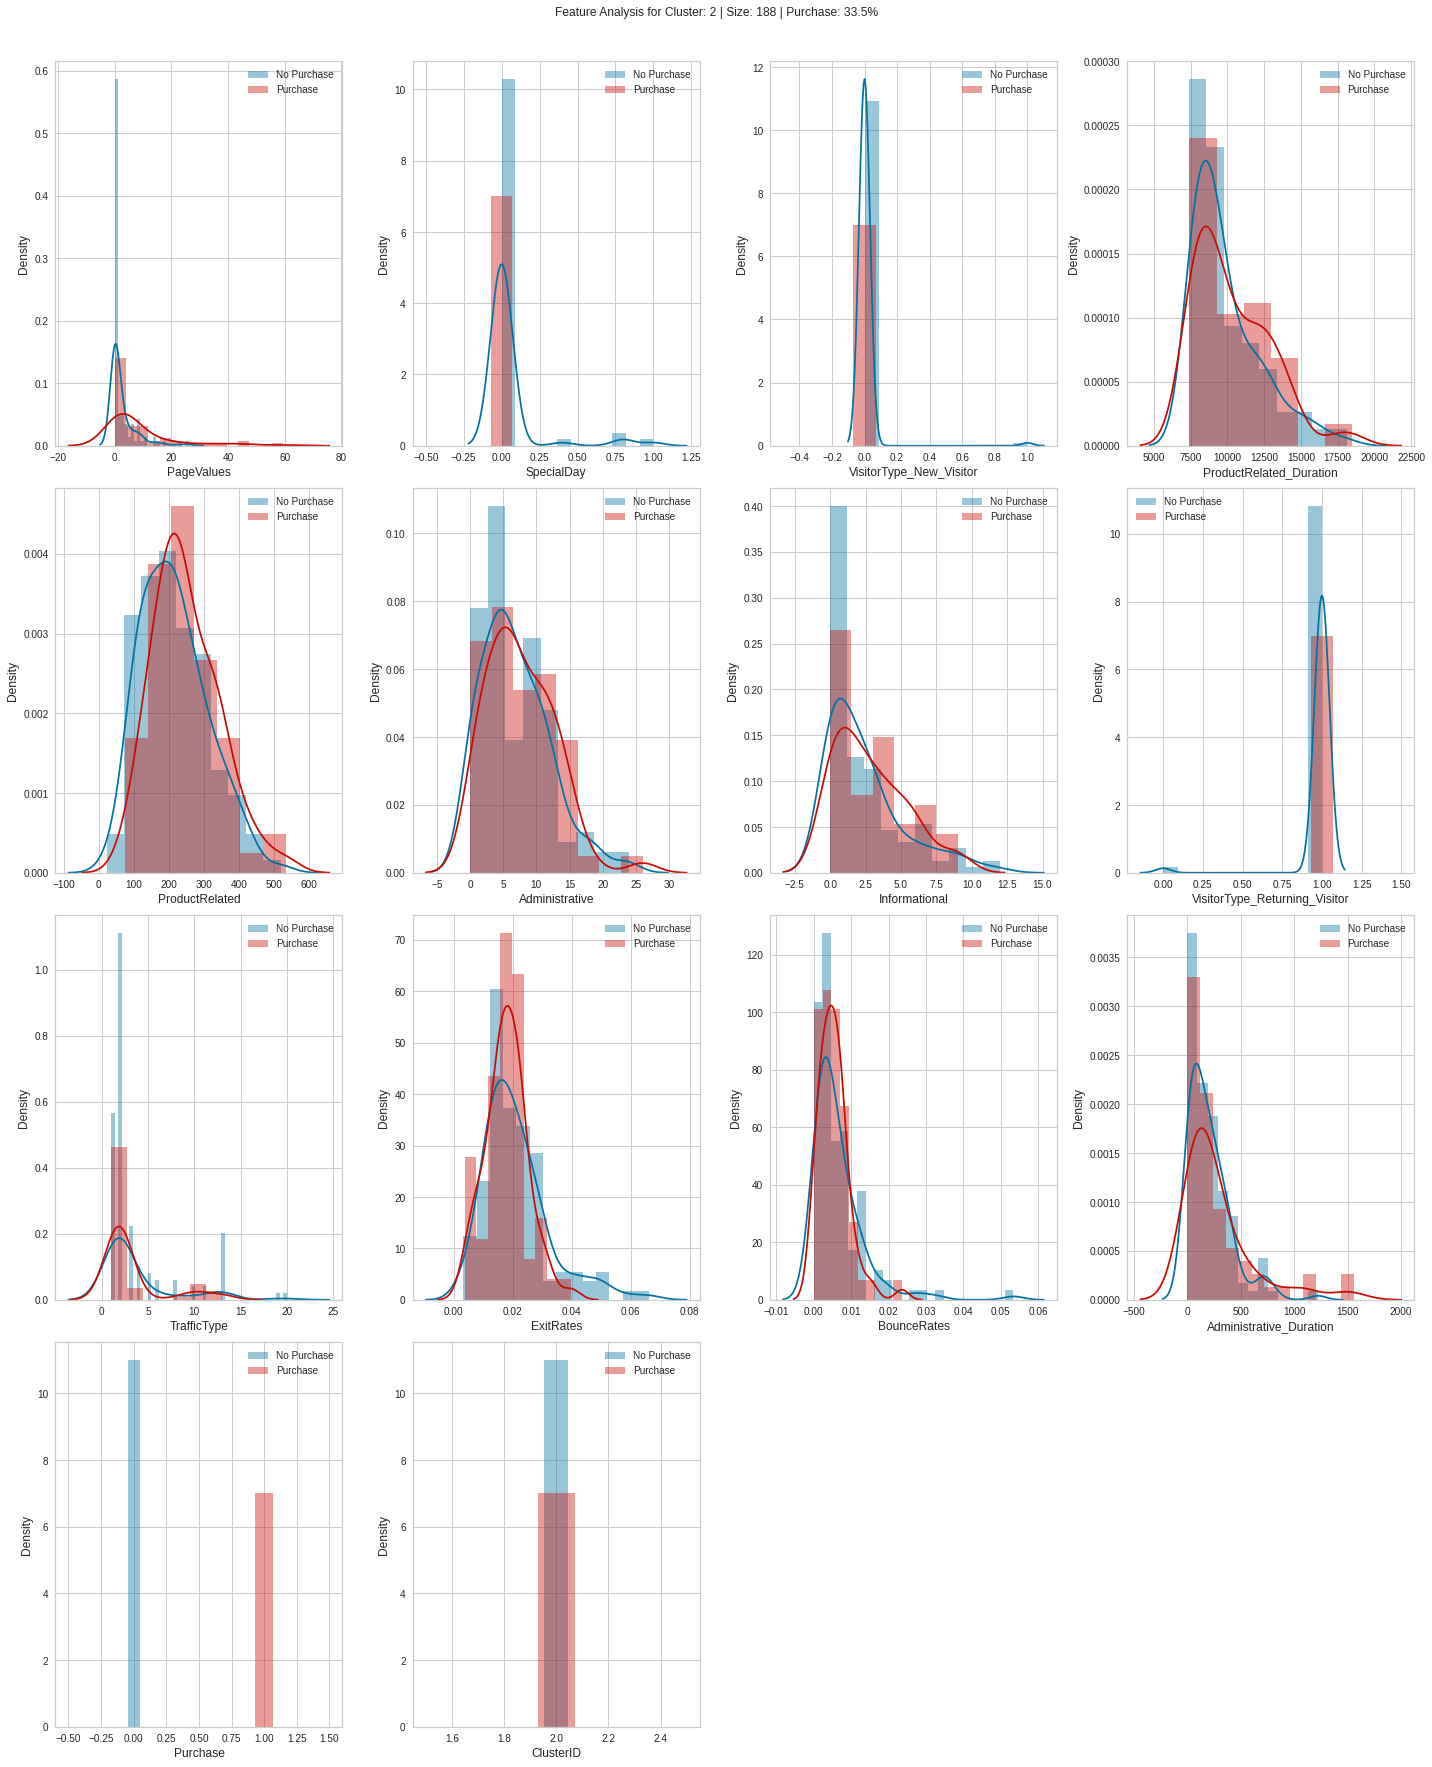

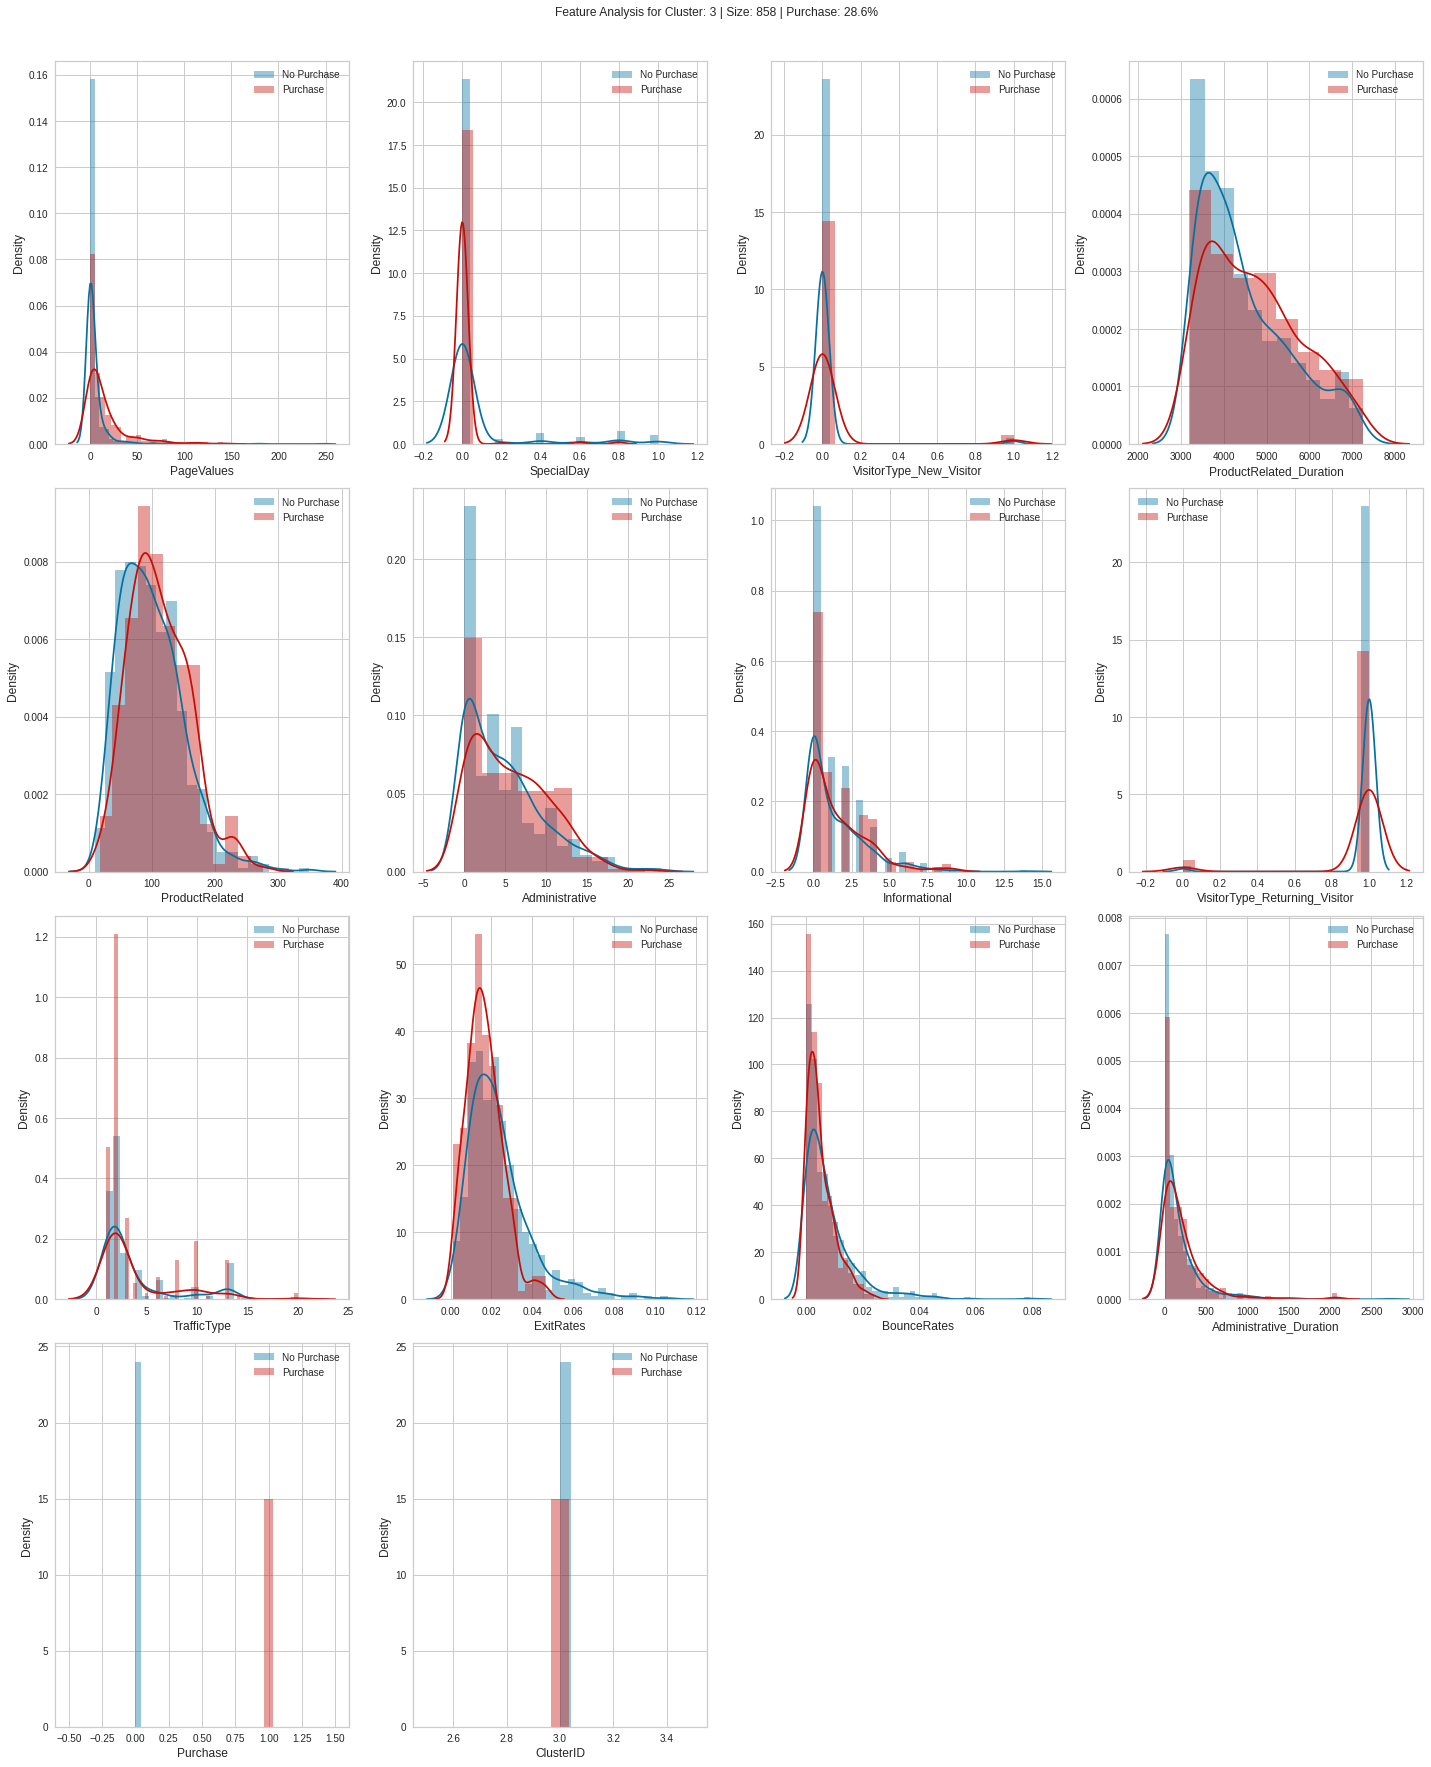

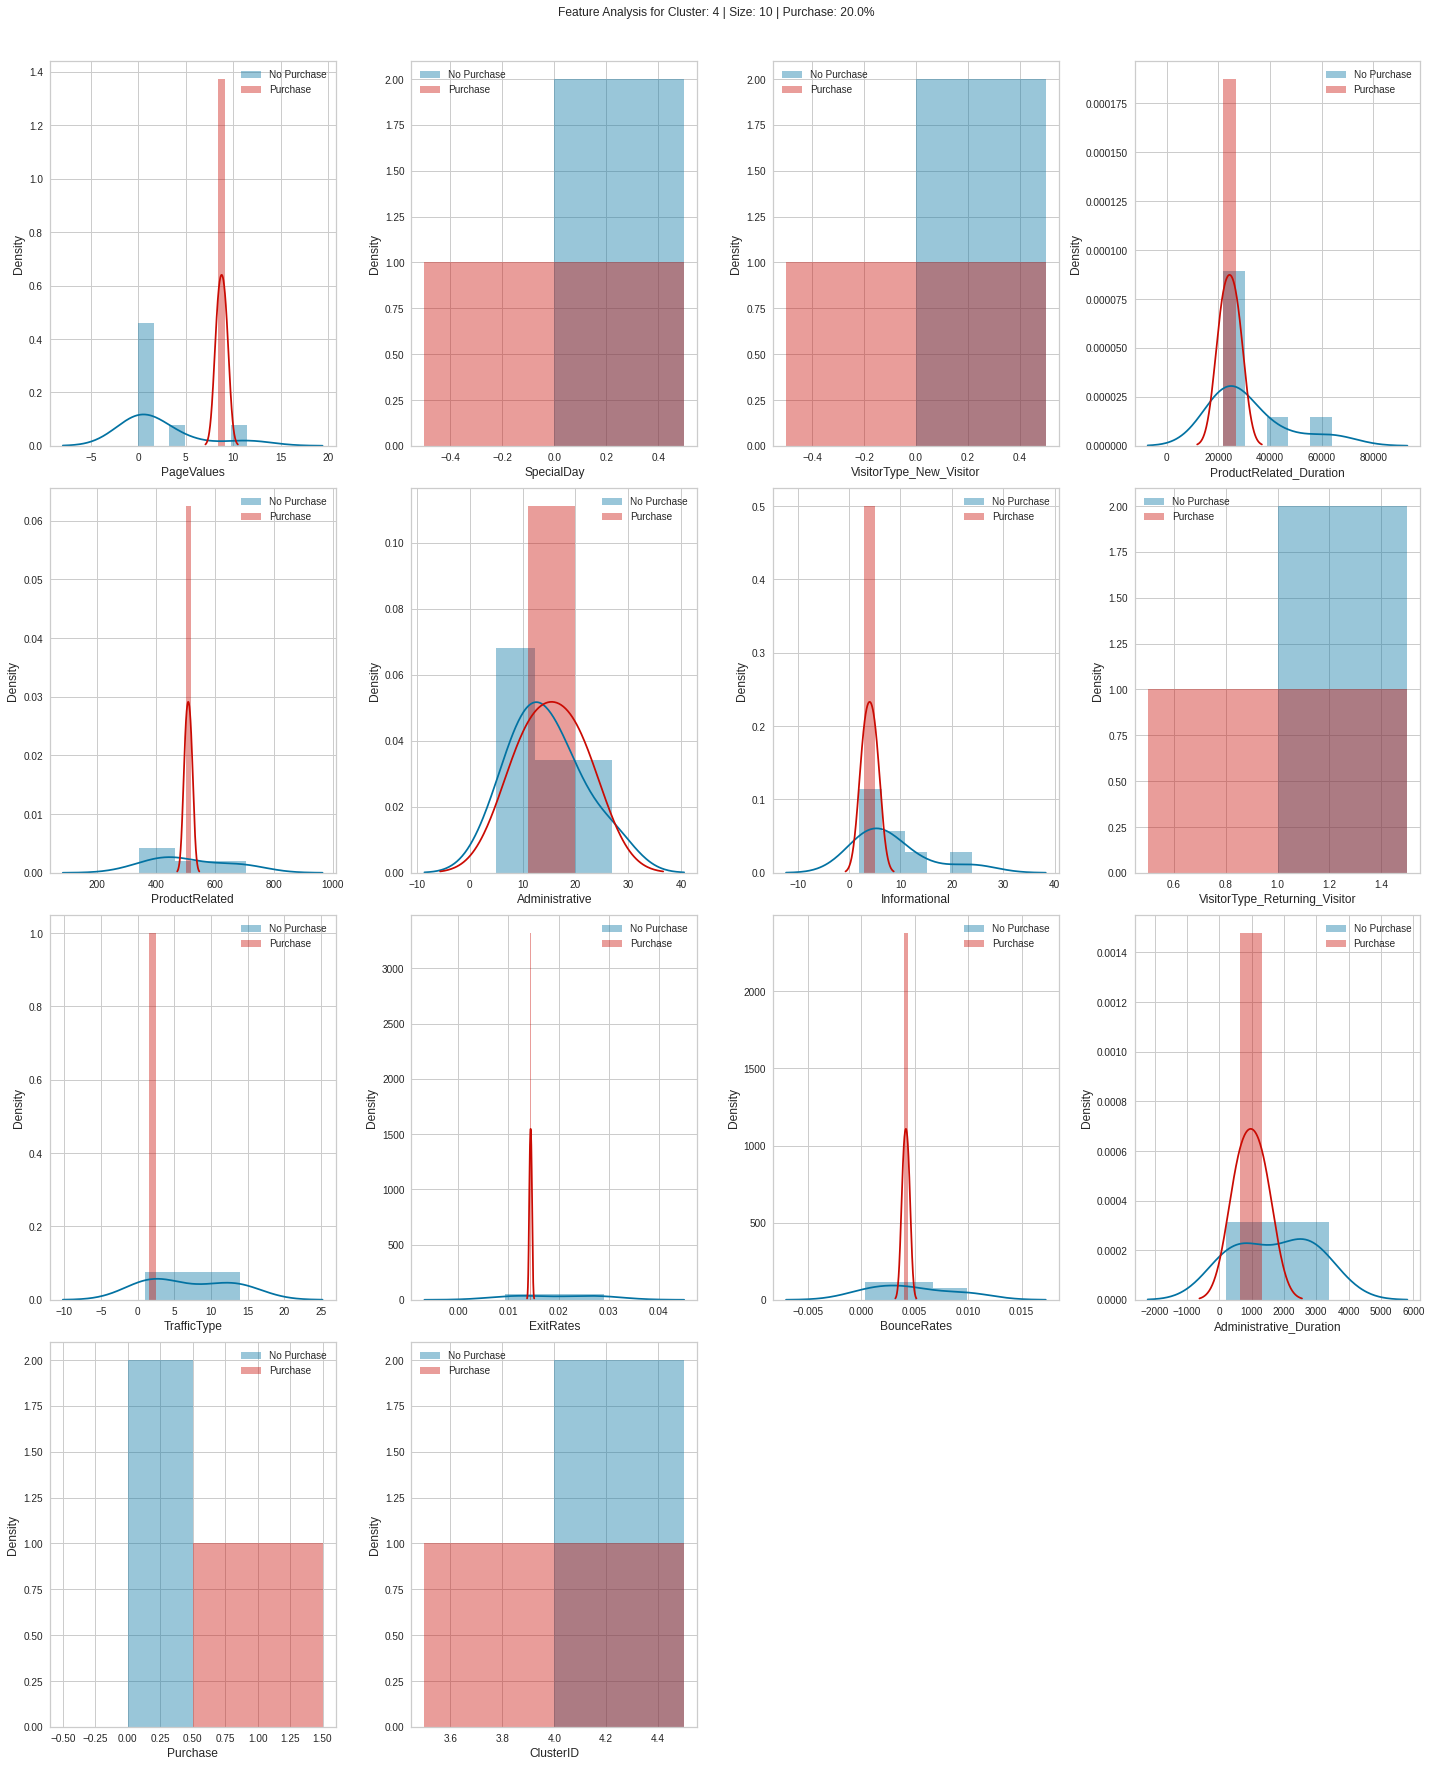

In [ ]:
for cluster in unique_values:

    result      = X_train.loc[X_train['ClusterID'] == cluster]     # Data for this cluster
    n_cluster   = len(result)                                      # Size of cluster
    n_purchases = len(result[(result['Purchase']==1)])             # Purchases made by this cluster
    buy_pct     = (n_purchases / n_cluster) * 100                  # Purchase Percentage of Cluster 
    str_pct     = str(buy_pct)[:4] +"%"                            # String version of percentage for chart display

    fig = plt.figure(figsize = (20, 25))
    j = 0
    
    for i,item in enumerate(result.columns):
        plt.subplot(4, 4, j+1)
        j += 1
        sb.distplot(result[item][result['Purchase']==0], color='b', label = 'No Purchase')
        sb.distplot(result[item][result['Purchase']==1], color='r', label = 'Purchase')
        plt.legend(loc='best')
        
    fig.suptitle('Feature Analysis for Cluster: '+str(cluster) + ' | Size: '+ str(n_cluster) + ' | Purchase: '+ str_pct)
    fig.tight_layout()
    fig.subplots_adjust(top=0.95)
    
    plt.show()

## **Cluster 0 - "Just Browsing"**
Count: 8316

Purchase(%): 11.5% (Below Average)

Description:

Majority of shoppers. They are more likely to be a new visitor, they spend a below average amount of time on Product information and more likely to NOT make a purchase

## **Cluster 1 - "Interested Shopper"**
Count: 2958

Purchase(%): 21.5%

Description:

Returning visitor who spends time on product related information and has an above average chance of making a purchase. This is the largest cohort of purchasers.

## **Cluster 2 - "Passionate Researcher"**
Count: 188

Purchase(%): 33.5%

Description:

Returning visitor who spends a long time on the site, is interested in the product and spends an above average amount of time looking at product related information is highly likely to make a purchase

## **Cluster 3 - "Back for More / Enthusiast"**
Count: 878

Purchases: 28.6%

Description:

Returning visitor who spends a long time on the site (but half the time on average as "Researchers") looking at product related information and is highly likely to make a purchase (though less likely than "Researcher"). More common than the rare "Researcher" but less common than "Shopper".

## **Cluster 4 - "ERROR"**

Count: 10

Purchase(%): 20%

Description:

Customer count is too small and time spent on Product-related information is ridiculous. Maybe erroneous shopping carts / checkouts etc. 

# Step 3: Semi-Supervised Data Augmention

Imagine that training data with the 'Revenue' attribute only for records from June-Sept only. For all records from Oct-Dec, the 'Revenue' attribute is missing.

Building a semi-supervised self labelling model to estimate 'Revenue' for the missing records in Oct-Dec and then fit the classifier.

Comparing and reporting the classification performance on Feb-March data set with and without the self-labelled data.


## Split the dataset into training and test

In [ ]:
# Train the model on data in the months of June-Dec only
semi_train_df = shopping_df[ (shopping_df["Month_Feb"]!= 1) & (shopping_df["Month_Mar"] != 1) ]

# For all records from June, July, Aug, Sep copy the 'Revenue' attribute / else it is UNLABELED_DATA
def apply_row(row):
    if row["Month_June"]==1 or row["Month_Jul"]==1 or row["Month_Aug"]==1 or row["Month_Sep"]==1:
        return row["Revenue_True"]
    else:
        return UNLABELED_DATA

semi_train_df["Revenue_Mask"] = semi_train_df.apply(apply_row, axis=1)

# Check to see if label masking worked properly
print("Verifying label masking. The months from Oct-Dec should have negative values / the rest are positive")

for month_label in month_cols:
    if month_label not in ["Month_Feb","Month_Mar","Month_May"]:
        print(month_label,semi_train_df[(semi_train_df[month_label]==1)].sum()["Revenue_Mask"])
    
# Prepare the Training data
semi_train_df.drop(columns=month_cols,inplace=True)
print(semi_train_df.shape)
n_train = len(semi_train_df)
print("Size of training data = visits in June-Dec = ", n_train)

# Prepare the Test data
semi_test_df = shopping_df[ (shopping_df["Month_Feb"] == 1) ^ (shopping_df["Month_Mar"] == 1) ]
semi_test_df.drop(columns=month_cols,inplace=True)
semi_test_df["Revenue_Mask"] = UNLABELED_DATA
print(semi_test_df.shape)
n_test = len(semi_test_df)
print("Size of testing data = visits in Fed-Mar = ", n_test)


print("Assert that the size of the testing data and training data = original shopping data:",(n_test + n_train == n_shoppers))

assert n_test + n_train == n_shoppers


Verifying label masking. The months from Oct-Dec should have negative values / the rest are positive
Month_Aug 76.0
Month_Dec -1727.0
Month_Jul 66.0
Month_June 29.0
Month_Nov -2998.0
Month_Oct -549.0
Month_Sep 86.0
(10239, 22)
Size of training data = visits in June-Dec =  10239
(2091, 22)
Size of testing data = visits in Fed-Mar =  2091
Assert that the size of the testing data and training data = original shopping data: True


In [ ]:
X_train_semi = semi_train_df.iloc[:,:-3]
print(X_train.shape)

y_train_semi = semi_train_df["Revenue_Mask"].values.reshape(-1,1)
print(y_train.shape)

X_test_semi = semi_test_df.iloc[:,:-3]
print(X_test.shape)

y_test_semi = semi_test_df["Revenue_True"].values.reshape(-1,1)
print(y_test.shape)

(12330, 14)
(10239, 1)
(2091, 19)
(2091, 1)


In [ ]:
# Label Spreading

# Initialize the model
lb_model = LabelSpreading(gamma=0.25, max_iter=20)   # or LabelPropagation()

# Train the model
print("Running label propagation ...")
lb_model.fit(X_train_semi, y_train_semi)

# Get labels for entire training dataset data
tran_labels = lb_model.transduction_

n_tran_labels = len(tran_labels)
print("Number of propagated labels:",n_tran_labels)

y_train_semi = tran_labels.reshape(-1,1)

print(tran_labels.shape)
print(y_train_semi.shape)

Running label propagation ...
Number of propagated labels: 10239
(10239,)
(10239, 1)


In [ ]:
print("Training Best Model on Semi-Supervised Data")

new_scoreboard = cScoreboard()

ml_models = [("XGB (Semi)", XGBClassifier(**gsearch.best_params_))]
new_scoreboard.score_models(ml_models, X_train_semi, y_train_semi, X_test_semi, y_test_semi)
new_scoreboard.print()

scoreboard.print()

Training Best Model on Semi-Supervised Data
Running XGB (Semi)


,Model,Accuracy,Precision,Recall,F1,CM,Train,Predict
0,XGB (Semi),0.911047,0.52795,0.435897,0.477528,"[[1820, 76], [110, 85]]",3.241413,0.030994


,Model,Accuracy,Precision,Recall,F1,CM,Train,Predict
5,XGBoost,0.950263,0.745946,0.707692,0.726316,"[[1849, 47], [57, 138]]",0.632023,0.006566
4,Random Forest,0.938785,0.731034,0.543590,0.623529,"[[1857, 39], [89, 106]]",0.128611,0.006356
2,Logistic (Linear),0.935438,0.788462,0.420513,0.548495,"[[1874, 22], [113, 82]]",0.214187,0.002687
1,Too Optimistic,0.093257,0.093257,1.000000,0.170604,"[[0, 1896], [0, 195]]",0.000001,0.000020
3,Support Vector,0.907700,1.000000,0.010256,0.020305,"[[1896, 0], [193, 2]]",3.052603,0.540602
0,Lazy,0.906743,0.000000,0.000000,0.000000,"[[1896, 0], [195, 0]]",0.000002,0.000041


## Explanation for the results of the Semi-Labeled Data

The same optimized model with the same hyperparameters (as The "Best Model" with labelled data) performs worse on semi-labeled data across all metrics for F1, Accuracy, Precision and Recall.

This is as expected as the label propagation process because it is less accurate than the actual data and it infers and extrapolates the data. As seen from the differnce in each of the respective Confusion Matrix metrics - there seem to be many more False Positives using this approach. 

If profiling potential customers and paying a referral to direct them to go to the site then 'False Positives' are more of a problem because we predicted they would make a purchase and they did not and worse we had to pay for a referral, coupons would not be a problem as they did not purchase. And also have fewer 'True Negatives' in the semi-labeled model, which are likely converting to 'False Positives'. 'False Negatives' which we predicted they would not buy but they bought should be less of a problem as a sale was made and it did not cost the business. 

So depending on the business model, the use of Semi-Labeled data may be problematic as the model performs more poorly and it is most costly in terms of wasted marketing/advertising expenses.

